<a href="https://colab.research.google.com/github/jpeoshadel/Deep-Learning-Course/blob/main/20250925_Project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

feature 0    0.074087
feature 1    0.268488
feature 2    0.092867
feature 3    0.076594
feature 4    0.076453
feature 5    0.168781
feature 6    0.110594
feature 7    0.132136
dtype: float64


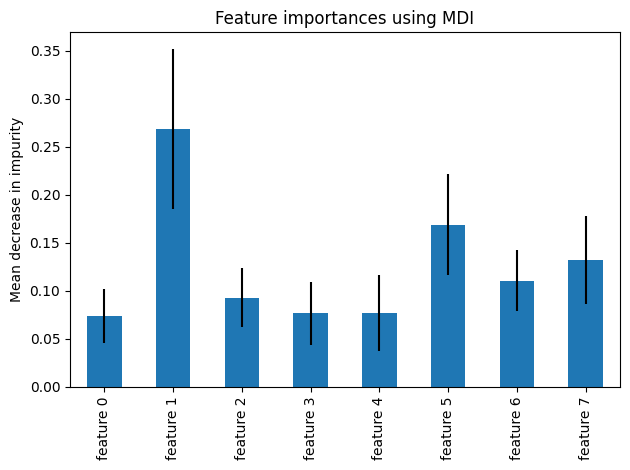

In [9]:
# 匯入相關套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, metrics, model_selection, preprocessing
from sklearn.model_selection import train_test_split
import time # Import time module

# 載入糖尿病資料集
df = pd.read_csv("diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成輸入的訓練資料和標籤資料 (最後一個欄位為outcome)
X = dataset[:, :-1]
y = dataset[:, -1]

# Get the last digit of the current time for random_state
current_time = int(time.time())
random_state_digit = current_time % 10

# 將資料分為train與test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state_digit, stratify=y)
feature_names = df.columns[:-1] # 讀取原始資料的欄位名稱

# 匯入套件
from sklearn.ensemble import RandomForestClassifier
# 讀取特徵數
feature_names = [f"feature {i}" for i in range(X.shape[1])]
# 定義模型
forest = RandomForestClassifier(random_state=random_state_digit) # Use the same random_state
# 訓練模型
forest.fit(X_train, y_train)
# 評估模型
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
# 顯示結果
print(forest_importances)

# 圖型視覺化
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()